In [279]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [280]:
# Loading CSV:

def loadCSV(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=0, unpack=False)
    x_first_feature = data[:,0] # First row! Need to get this on a matrix-form!
    x_second_feature = data[:,1]
    X = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D
    numOfColumns = data.shape[1]
    Y = data[:,data.shape[1]-1]
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X] # Merge two matrices
    return data, X, Y, x_first_feature, x_second_feature

dataTrain, XTrain, YTrain, x_first_feature_train,x_second_feature_train = loadCSV('cl_train_1.csv')
dataTest, XTest, YTest, x_first_feature_test,x_second_feature_test = loadCSV('cl_test_1.csv')


In [281]:
# Logistic Regression with Gradient descent. Defining functions:
# z = h(x)
def linearSignal(w, x):
    return (w.T).dot(x)

# Sigma, the sigmoid function. Returns a number between 0 and 1. 
def logistic(z):
    return ( 1 / (1 + math.exp(-z)))
    
# Returns a probability that the datapoint (1,x1,x2) is in y.
def prob(w,x,y):
    z = linearSignal(w,x)
    probability = (logistic(z)**y)*(1 - logistic(z))**(1-y)
    return probability

# Calculating the cross-entropy error on the training and the test-set:
def CEE(X,Y,trainedWeights):
    error = 0
    place = 0
    for y in Y:
        z = linearSignal(trainedWeights,X[place])
        sigmaZ = logistic(z)
        error = error + (y* (np.log(sigmaZ)) + (1 - y)*np.log(1-sigmaZ))
        place += 1
    return -error/((Y.shape[0]))

In [282]:
# Calculation the weights with Gradient descent:

def gradientDescent(X,Y,LR,weights,iterations,Xtest,Ytest):
    it = 0
    error_arrayTrain = np.ones(iterations)
    error_arrayTest = np.ones(iterations)
    placeInErrorArray = 0
    while it < iterations:
        place = 0
        summ = 0
        
        
        for x in X:
            summ = summ + np.dot((logistic(linearSignal(weights,x)) - Y[place]),x)
            place+=1
            
        # Calculating the error with CEE for each iteration:
        error_Train = CEE(X, Y, weights)
        error_Test = CEE(Xtest, Ytest, weights)

        
        # Adding it to the error_array:
        error_arrayTrain[placeInErrorArray] = error_Train
        error_arrayTest[placeInErrorArray] = error_Test
        
        # Calc the weights for every iteration:
        weights = weights - (LR*summ)
        it+=1
        placeInErrorArray += 1
        
    return weights, error_arrayTrain, error_arrayTest


In [283]:
## Using the functions to calculate values:

# Setting the initial weights in the range -0.5 to 0.5:
initWeights = np.array([0.5, 0.5,0.5])

# Training
trained_Weights, error_arrayTrain,error_arrayTest  = gradientDescent(XTrain,YTrain, 0.2,initWeights, 1000, XTest,YTest)

error_After_Iteration = CEE(XTrain, YTrain, trained_Weights)
print("Training-error_After_Iteration: ", error_After_Iteration)

Training-error_After_Iteration:  0.014713762602761296


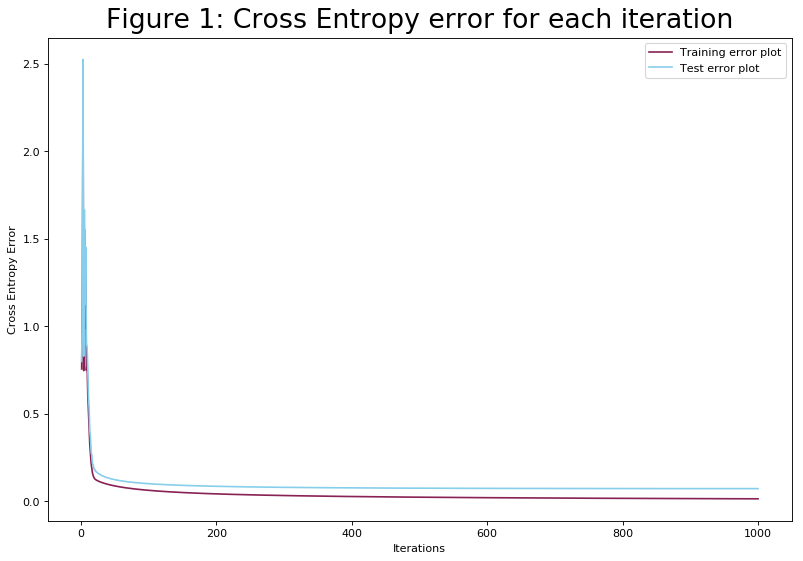

In [284]:
# Plotting the iteration error for the training data: 
def errorPlot(error1,error2):
    xVals = (list(range(1001)))
    xVals.pop(0)
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    font = {
            'weight' : 'bold',
            'size'   : 12}
    plt.xlabel('Iterations')
    plt.ylabel('Cross Entropy Error')
    plt.title('Figure 1: Cross Entropy error for each iteration', size = 24)
    plt.plot(xVals, error1, color = "#882255", label = 'Training error plot')
    plt.plot(xVals, error2,label = 'Test error plot', color = 'skyblue')
    plt.legend()
    plt.show()
    
errorPlot(error_arrayTrain,error_arrayTest)

In [285]:
# Prediction after training:
# if w.T.dot(x) >= 0: place the point in 1-array.
# print(trained_Weights)


def classifyDataPoint(inputX,inputY,weights):
    arrayClass_1_x1 = np.array([])
    arrayClass_1_x2 = np.array([])
    arrayClass_2_x1 = np.array([])
    arrayClass_2_x2 = np.array([])

    # Need to loop through the points 
    for x in inputX:
        z = linearSignal(weights,x)
        if z >= 0:
            # place the point in an array of the ones class.
            arrayClass_1_x1 = np.append(arrayClass_1_x1,[x[1]],axis=0)
            arrayClass_1_x2 = np.append(arrayClass_1_x2,[x[2]],axis=0)

        else:
            arrayClass_2_x1 = np.append(arrayClass_2_x1,[x[1]],axis=0)
            arrayClass_2_x2 = np.append(arrayClass_2_x2,[x[2]],axis=0)
    return arrayClass_1_x1, arrayClass_1_x2, arrayClass_2_x1, arrayClass_2_x2

# Training classification:
class_1_x1, class_1_x2, class_2_x1, class_2_x2 = classifyDataPoint(XTrain, YTrain, trained_Weights)

# Test classification:
class_1_x1_test, class_1_x2_test, class_2_x1_test, class_2_x2_test = classifyDataPoint(XTest, YTest, trained_Weights)

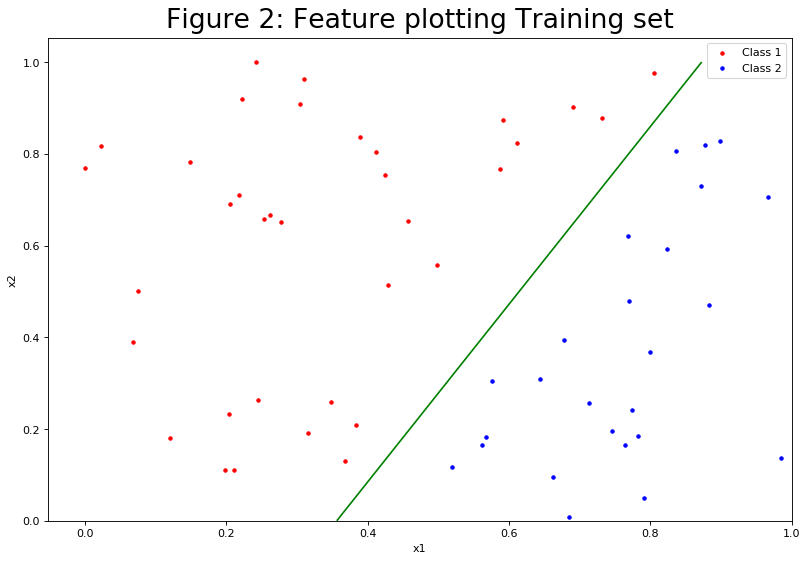

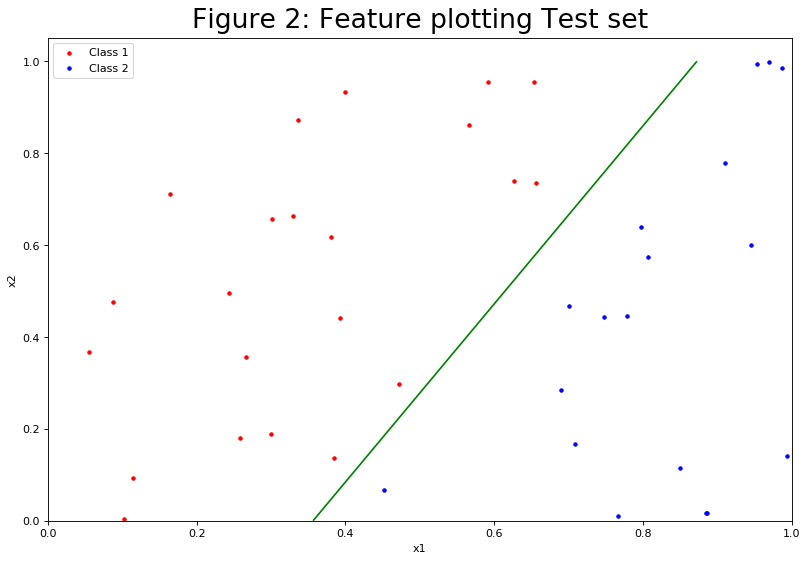

In [286]:
# Plotting the data:
# Plotting the iteration error for the training data: 
# numpy.linspace & numpy.meshgrid with matplotlib.pyplot.contour

def plotFeaturesAndModel(class1_x1, class1_x2,class2_x1,class2_x2,Xinput, weights, name):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    font = {
            'weight' : 'bold',
            'size'   : 12}

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Figure 2: Feature plotting '+name, size = 24)
    plt.scatter(class1_x1, class1_x2, marker='.',color='r', label = "Class 1")
    plt.scatter(class2_x1, class2_x2, marker='.',color='b', label = "Class 2")

    # Plotting the model z = h(x,w) as well:
    x_axis = np.linspace(0,1,1000)
    y_axis = np.linspace(0,1,1000)

    xx, yy = np.meshgrid(x_axis,y_axis)
    z = weights[0] + weights[1]*xx + weights[2]*yy 
    
    plt.contour(xx, yy, z, levels=1, colors='green')
    
    plt.legend()
    plt.show()
    
plotFeaturesAndModel(class_1_x1,class_1_x2,class_2_x1, class_2_x2, XTrain, trained_Weights, "Training set")
plotFeaturesAndModel(class_1_x1_test, class_1_x2_test, class_2_x1_test, class_2_x2_test, XTest, trained_Weights,"Test set")

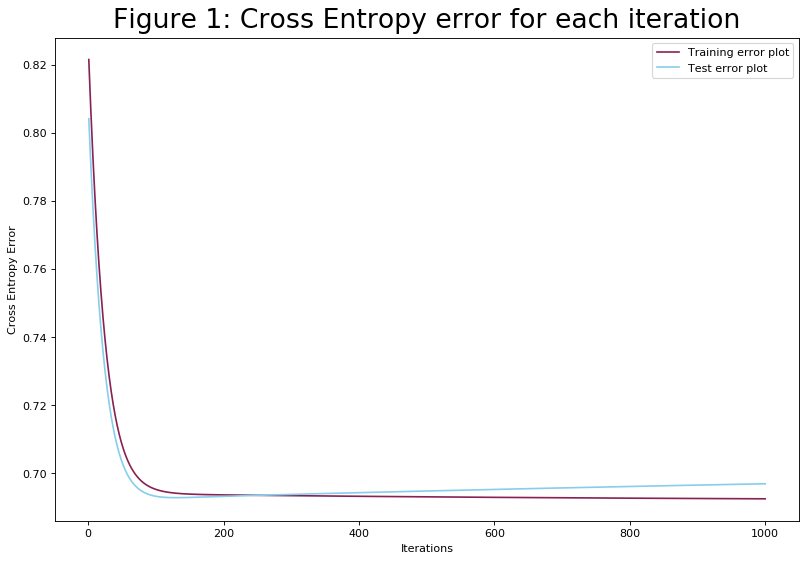

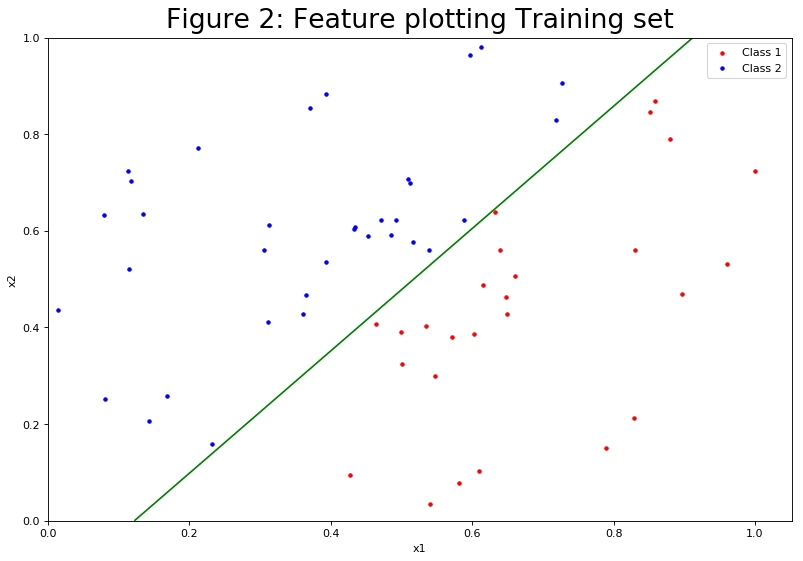

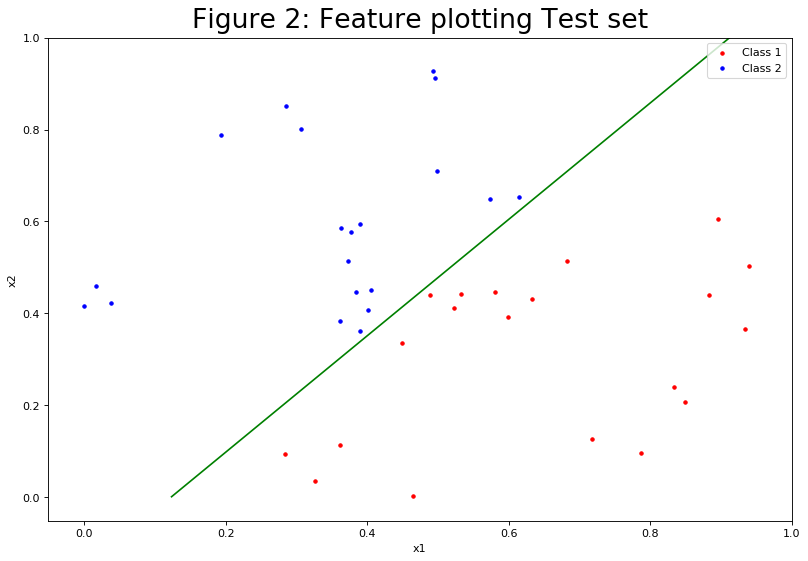

In [287]:
# Question 2.2:

# Loading the sets:
dataTrain_2, XTrain_2, YTrain_2, x_first_feature_train_2,x_second_feature_train_2 = loadCSV('cl_train_2.csv')
dataTest_2, XTest_2, YTest_2, x_first_feature_test_2,x_second_feature_test_2 = loadCSV('cl_test_2.csv')

# Training the weights with the gradient descent implementation:
initWeights = np.array([0.5, 0.5,0.5])
trained_Weights_2, error_arrayTrain_2,error_arrayTest_2  = gradientDescent(XTrain_2,YTrain_2, 0.001,initWeights, 1000, XTest_2,YTest_2)

# Plotting the errors:
errorPlot(error_arrayTrain_2,error_arrayTest_2)

## Drawing the contour plot:

# Training classification:
class_1_x1_train_2, class_1_x2_train_2, class_2_x1_2, class_2_x2_2 = classifyDataPoint(XTrain_2, YTrain_2, trained_Weights_2)

# Test classification:
class_1_x1_test_2, class_1_x2_test_2, class_2_x1_test_2, class_2_x2_test_2 = classifyDataPoint(XTest_2, YTest_2, trained_Weights_2)

# Plotting the features:
plotFeaturesAndModel(class_1_x1_train_2,class_1_x2_train_2,class_2_x1_2, class_2_x2_2, XTrain_2, trained_Weights_2, "Training set")
plotFeaturesAndModel(class_1_x1_test_2, class_1_x2_test_2, class_2_x1_test_2, class_2_x2_test_2, XTest_2, trained_Weights_2,"Test set")
